In [0]:
import tensorflow as tf

import numpy as np
from matplotlib import pyplot as p

from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data() 

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_train = (x_train-x_train.min()) / (x_train.max()-x_train.min())
x_test = (x_test-x_test.min()) / (x_test.max()-x_test.min())



170500096/170498071 [==============================] - 11s 0us/step


In [0]:
cnn = Sequential()

cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),activation="relu"))
cnn.add(MaxPool2D())
cnn.add(Conv2D(64,kernel_size=(5,5),activation="relu"))
cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation="relu"))
cnn.add(Dense(10,activation="softmax"))


cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


W0802 21:23:35.026628 140088586844032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 21:23:35.082280 140088586844032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 21:23:35.093344 140088586844032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 21:23:35.148325 140088586844032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 21:23:35.216887 140088586844032 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 82s 2ms/step - loss: 1.4261 - acc: 0.4836 - val_loss: 1.2259 - val_acc: 0.5748
Epoch 2/10
50000/50000 [==============================] - 79s 2ms/step - loss: 1.0689 - acc: 0.6240 - val_loss: 1.0275 - val_acc: 0.6389
Epoch 3/10
50000/50000 [==============================] - 79s 2ms/step - loss: 0.8727 - acc: 0.6964 - val_loss: 0.9494 - val_acc: 0.6767
Epoch 4/10
50000/50000 [==============================] - 79s 2ms/step - loss: 0.7158 - acc: 0.7514 - val_loss: 0.9270 - val_acc: 0.6896
Epoch 5/10
50000/50000 [==============================] - 79s 2ms/step - loss: 0.5752 - acc: 0.7990 - val_loss: 0.9800 - val_acc: 0.6866
Epoch 6/10
50000/50000 [==============================] - 76s 2ms/step - loss: 0.4431 - acc: 0.8458 - val_loss: 1.0326 - val_acc: 0.6936
Epoch 7/10
50000/50000 [==============================] - 75s 2ms/step - loss: 0.3308 - acc: 0.8832 - val_loss: 1.0930 - val_acc

In [0]:
from PIL import Image

labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


def predict(file) :
  img = Image.open(file).convert("RGB").resize((32,32),Image.ANTIALIAS)
  im = np.asarray(img)


  p.imshow(im)

  i = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])

  predict = cnn.predict(i)


  l = np.argmax(predict)

  print(labels[l])

airplane


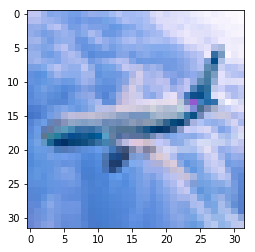

In [0]:
predict("maxresdefault.jpg")